In [492]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
%matplotlib inline
import math
from fractions import Fraction

In [3]:
# スタージェスの公式
def calc_sturges(x):
    return (np.log10([x])[0]*3.322 + 1)

### 第１章

In [5]:
calc_sturges(30)

5.906996808178718

In [17]:
calc_sturges(60)

6.907018453774464

In [49]:
(89 - 26)  / 7

9.0

In [34]:
data_1_2 = pd.read_csv("初歩からの統計-演習/1-2.csv", names=["value", "a", "b", "c", "d", "e", "f"])[["value"]]

In [35]:
(data_1_2["value"].max() -  data_1_2["value"].min()) / 2 

31.5

[Text(0, 0, '20-30'),
 Text(0, 0, '30-40'),
 Text(0, 0, '40-50'),
 Text(0, 0, '50-60'),
 Text(0, 0, '60-70'),
 Text(0, 0, '70-80'),
 Text(0, 0, '80-90')]

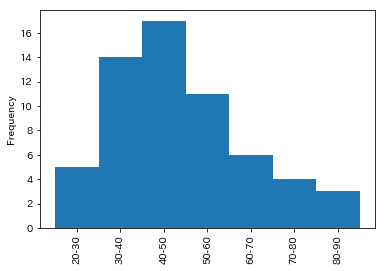

In [128]:
# ヒストグラム
labels = []
ticks = []
for index in [ i for i  in range(20, 90, 10)]:
    labels.append(str(index) + "-" + str(index + 10))
    ticks.append((index+5))
ax = data_1_2["value"].plot.hist(bins=7, range=(20, 90))
ax.set_xticks(ticks)
ax.set_xticklabels(labels=labels, rotation=90)

[Text(0, 0, '20'),
 Text(0, 0, '30'),
 Text(0, 0, '40'),
 Text(0, 0, '50'),
 Text(0, 0, '60'),
 Text(0, 0, '70'),
 Text(0, 0, '80'),
 Text(0, 0, '90')]

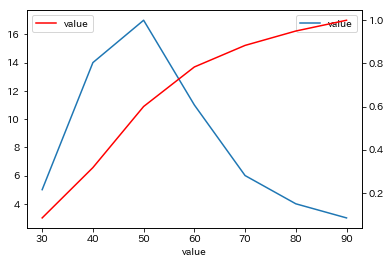

In [142]:
# 度数分布(青)
# 累積相対度数(赤)

ax = data_1_2.groupby(pd.cut(data_1_2["value"], range(20, 100, 10), right=False)).count().plot()
ax = (data_1_2.groupby(pd.cut(data_1_2["value"], range(20, 100, 10), right=False)).count().cumsum()/60).plot(ax=ax.twinx(), color="r")
ax.set_xticklabels(labels=[i for i in range(20, 100, 10)])

In [6]:
data_1_3 = pd.read_csv("初歩からの統計-演習/1-3.csv", names=["value", "a", "b", "c", "d", "e", "f"])[["value"]]

In [10]:
# 階級 8

calc_sturges(data_1_3.shape[0])

7.644

In [16]:
# 階級幅 10
data_1_3["value"] = data_1_3["value"].astype(int)
(data_1_3["value"].max() - data_1_3["value"].min()) / 8

7.0

In [41]:
# 度数分布表

data_1_3.groupby(pd.cut(data_1_3["value"], np.arange(15, 80, 7.5), right=False)).count()

,value
value,
"[15.0, 22.5)",3
"[22.5, 30.0)",9
"[30.0, 37.5)",18
"[37.5, 45.0)",23
"[45.0, 52.5)",22
"[52.5, 60.0)",14
"[60.0, 67.5)",8
"[67.5, 75.0)",3


[Text(0, 0, '15.0-22.5'),
 Text(0, 0, '22.5-30.0'),
 Text(0, 0, '30.0-37.5'),
 Text(0, 0, '37.5-45.0'),
 Text(0, 0, '45.0-52.5'),
 Text(0, 0, '52.5-60.0'),
 Text(0, 0, '60.0-67.5'),
 Text(0, 0, '67.5-75.0')]

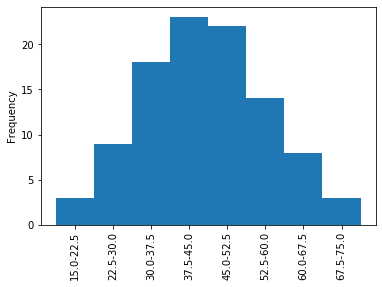

In [65]:
# ヒストグラム
ax = data_1_3["value"].plot.hist(bins=8, range=(15, 75))
ticks = [i for i in np.arange(15+3.75, 76, 7.5)]
labels = list(map(lambda x: str(x-3.75)+"-"+str(x+3.75) , ticks))
ax.set_xticks(ticks)
ax.set_xticklabels(labels=labels, rotation=90)

[Text(0, 0, '15.0'),
 Text(0, 0, '22.5'),
 Text(0, 0, '30.0'),
 Text(0, 0, '37.5'),
 Text(0, 0, '45.0'),
 Text(0, 0, '52.5'),
 Text(0, 0, '60.0'),
 Text(0, 0, '67.5'),
 Text(0, 0, '75.0')]

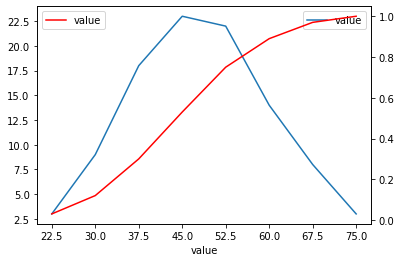

In [66]:
#度数折れ線(青)
#累積相対度数折れ線(赤)

ax = data_1_3.groupby(pd.cut(data_1_3["value"], np.arange(15, 80, 7.5), right=False)).count().plot()
ax =(data_1_3.groupby(pd.cut(data_1_3["value"], np.arange(15, 80, 7.5), right=False)).count().cumsum()/100).plot(c="red", ax=ax.twinx())
ticks = [i for i in np.arange(15, 80, 7.5)]
ax.set_xticklabels(labels=ticks)

### 第2章

In [36]:
#2-1

def show_statistics(arr):
    print(f"mean: {arr.mean()} meadian: {np.median(arr)}, mode: {stats.mode(arr)[0][0]}")
    
arr_1 = np.array([5, 6, 1, 7, 5, 2, 6, 5, 8])
print("arr_1")
show_statistics(arr_1)

arr_2 = np.array([9, 3, 7, 2, 3, 9, 8, 1, 3, 5])
print("arr_2")
show_statistics(arr_2)

arr_3 = np.array([6, 10, 1, 8, 46, 4, 7, 0 , 5, 3, 9])
print("arr_3")
show_statistics(arr_3)

arr_1
mean: 5.0 meadian: 5.0, mode: 5
arr_2
mean: 5.0 meadian: 4.0, mode: 3
arr_3
mean: 9.0 meadian: 6.0, mode: 0


In [41]:
#2-2

ave = (800*1300 + 900*700 + 1200*500) / (1300 + 700 + 500)
print(f"時給: {ave}円")

時給: 908.0円


In [58]:
# 2-3
def show_pow(arr):
    size = arr.shape[0]
    ret = math.pow(np.multiply.reduce(arr), (1/size))
    print(f"ans: {ret}")

arr_1 = np.array([2, 8])
print("arr_1:")
show_pow(arr_1)

arr_2 = np.array([3, 9, 27])
print("arr_2:")
show_pow(arr_2)

arr_3 = np.array([4, 5, 20, 25])
print("arr_3:")
show_pow(arr_3)

arr_4 = np.array([2, 4, 8, 16, 32])
print("arr_4:")
show_pow(arr_4)

arr_5 = np.array([2, 3, 4, 9, 12, 18])
print("arr_5:")
show_pow(arr_5)

arr_1:
ans: 4.0
arr_2:
ans: 8.999999999999998
arr_3:
ans: 10.0
arr_4:
ans: 8.000000000000002
arr_5:
ans: 5.999999999999999


In [84]:
# 2-4

# 2005年人口* (1 + 成長率)^8 = 2013年人口

ratio_a = (math.pow(2418/2305, 1/8) - 1)*100
print(f"A国人口増加率 {ratio_a}%")

ratio_b = (math.pow(2103/1942, 1/8) - 1)*100
print(f"B国人口増加率 {ratio_b}%")

# 2020年人口
print(f"2020年 A国 {round((2305* math.pow(1+ratio_a/100, 15)))}人, B国 {round(1942* math.pow(1+ratio_b/100, 15))}人")

# 2025年人口
print(f"2025年 A国 {round((2305* math.pow(1+ratio_a/100, 20)))}人, B国 {round(1942* math.pow(1+ratio_b/100, 20))}人")

# 2030年人口
print(f"2030年 A国 {round((2305* math.pow(1+ratio_a/100, 25)))}人, B国 {round(1942* math.pow(1+ratio_b/100, 25))}人")

#  A国とB国の人口が同水準になる年
2005 + round(math.log10(2305/1942) / math.log10((1+ratio_b/100) / (1+ratio_a/100)))

A国人口増加率 0.6000440417290198%
B国人口増加率 1.0005539868486402%
2020年 A国 2521人, B国 2255人
2025年 A国 2598人, B国 2370人
2030年 A国 2677人, B国 2491人


2048

In [141]:
#2-5
from functools import reduce
def add_one(x):
    return x+1

ratios = np.array([0.1, 0.2, 0.4])
math.pow(reduce((lambda x, y:  x*y) , add_one(ratios)), 1/ratios.shape[0]) - 1

0.2271584879323918

In [165]:
# 2-6

ratio = 1 - math.pow(30/300, 1/8)

# 1年後の減価償却費
ans_1 = 300 - 300*(1-ratio)
print(ans_1)

# 2年後の減価償却費
ans_2 = (300 - ans_1) - (300 - ans_1)*(1-ratio)
print(ans_2)

# 3年後の減価償却費
ans_3 = (300 - ans_1 - ans_2) - (300 - ans_1 - ans_2)*(1-ratio)
print(ans_3)

75.03173720026325
56.265865242632
42.193446528530046


In [188]:
# 2-7

data = pd.read_csv("初歩からの統計-演習/2-7.csv")[["value"]]

print(f"mean:{data['value'].mean()} median: {data['value'].median()} mode: {data['value'].mode()[0]}")

print(f"trim_5% mean: {data['value'].sort_values()[1:19].mean()}")
print(f"trim_10% mean: {data['value'].sort_values()[2:18].mean()}")
print(f"trim_20% mean: {data['value'].sort_values()[4:16].mean()}")

mean:14.0 median: 10.5 mode: 4
trim_5% mean: 12.0
trim_10% mean: 11.0
trim_20% mean: 10.0


In [194]:
text = "330 150 730 420 1530 300 80 390 940 210 1290 320 120 660 480 270 850 330 240 530 50 790 350 230 640 460 180 1850 310 570"

In [204]:
# 2-8
data = pd.read_csv("初歩からの統計-演習/2-8.csv")[["value"]]

print(f'mean: {data["value"].mean()} median: {data["value"].median()}')
      
print(f"trim_10% mean: {data['value'].sort_values()[3:27].mean()}")
print(f"trim_20% mean: {data['value'].sort_values()[6:24].mean()}")

mean: 520.0 median: 370.0
trim_10% mean: 445.0
trim_20% mean: 420.0


In [212]:
# 2- 10

data = pd.read_csv("初歩からの統計-演習/1-2.csv", names=["value", "a", "b", "c", "d", "e", "f"])[["value"]]

print(f'mean: {data["value"].mean()} median: {data["value"].median()}')

print(f"trim_5% mean: {data['value'].sort_values()[3:57].mean()}")
print(f"trim_10% mean: {data['value'].sort_values()[6:54].mean()}")
print(f"trim_20% mean: {data['value'].sort_values()[12:48].mean()}")

mean: 49.0 median: 44.5
trim_5% mean: 48.0
trim_10% mean: 47.5
trim_20% mean: 46.5


In [237]:
# 2-11

#  ３項移動平均
display(pd.read_csv("初歩からの統計-演習/2-11.csv")[["value"]].rolling(3, center=True).mean().dropna())

#  5項移動平均
display(pd.read_csv("初歩からの統計-演習/2-11.csv")[["value"]].rolling(5, center=True).mean().dropna())

#  中心化4項移動平均
display(pd.read_csv("初歩からの統計-演習/2-11.csv")[["value"]].rolling(4).mean().shift(-2).rolling(2).mean().dropna())

,value
1,62.0
2,58.0
3,48.0
4,46.0
5,30.0
6,22.0
7,16.0
8,14.0
9,24.0
10,34.0


,value
2,56.4
3,49.2
4,40.8
5,32.4
6,24.0
7,20.4
8,19.2
9,26.4
10,42.0
11,51.6


,value
2,57.00
3,48.75
4,42.75
5,31.50
6,23.25
7,18.75
8,17.25
9,25.50
10,39.00
11,54.00


### 第３章

範囲 -> 9
第1四分位数 -> 2
第2四分位数 -> 4
第3四分位数 -> 6
四分位範囲 -> 4
四分位偏差 -> 2.0
平均偏差 -> 2.2857142857142856
メディアン偏差 -> 2.2857142857142856
分散 -> 9.0
標準偏差 -> 3.0
変動係数 -> 0.75
標本歪度 -> 0.4666666666666667


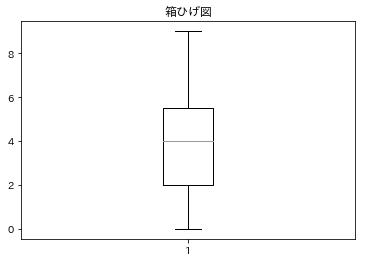

In [330]:
# 3-1

data = pd.read_csv("初歩からの統計-演習/3-1.csv")[["value"]].values.reshape(1, -1)[0]

print(f"範囲 -> {data.max() - data.min()}")

quantiles = np.quantile(data, [0.25, 0.5, 0.75], axis=0, interpolation="higher")
for index, value in enumerate(quantiles):
    print(f"第{index+1}四分位数 -> {value}")

print(f"四分位範囲 -> {quantiles[2] - quantiles[0]}")
print(f"四分位偏差 -> {(quantiles[2] - quantiles[0]) / 2}")

fig, ax = plt.subplots()
ax.boxplot(x=data)
ax.set_title("箱ひげ図")

def calc_deviation(x, value):
    return abs(x - value)
ave_deviation = calc_deviation(data, data.mean()).mean()
print(f"平均偏差 -> {ave_deviation}")

median_deviation = calc_deviation(data, np.median(data)).mean()
print(f"メディアン偏差 -> {median_deviation}")

print(f"分散 -> {np.var(data, ddof=1)}")

print(f"標準偏差 -> {np.std(data, ddof=1)}")

print(f"変動係数 -> {np.std(data, ddof=1)/data.mean()}")

def calc_3pow(x, value):
    return np.power(x - value, 3)

skew = data.shape[0] / ((data.shape[0] - 1)*(data.shape[0] - 2)) * calc_3pow(data, data.mean()).sum() / math.pow(round(np.std(data)), 3)
print(f"標本歪度 -> {skew}")

範囲 -> 16
第1四分位数 -> 16
第2四分位数 -> 20
第3四分位数 -> 24
四分位範囲 -> 8
四分位偏差 -> 4.0
平均偏差 -> 4.133333333333334
メディアン偏差 -> 4.133333333333334
分散 -> 25.0
標準偏差 -> 5.0
変動係数 -> 0.25
標本歪度 -> 0.35604395604395606


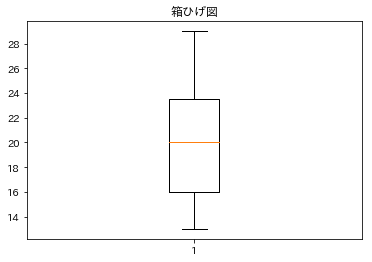

In [350]:
# 3-2

data = pd.read_csv("初歩からの統計-演習/3-2.csv")[["value"]].values.reshape(1, -1)[0]

print(f"範囲 -> {data.max() - data.min()}")

quantiles = np.quantile(data, [0.25, 0.5, 0.75], axis=0, interpolation="higher")
for index, value in enumerate(quantiles):
    print(f"第{index+1}四分位数 -> {value}")

print(f"四分位範囲 -> {quantiles[2] - quantiles[0]}")
print(f"四分位偏差 -> {(quantiles[2] - quantiles[0]) / 2}")

fig, ax = plt.subplots()
ax.boxplot(x=data)
ax.set_title("箱ひげ図")

ave_deviation = calc_deviation(data, data.mean()).mean()
print(f"平均偏差 -> {ave_deviation}")

median_deviation = calc_deviation(data, np.median(data)).mean()
print(f"メディアン偏差 -> {median_deviation}")

print(f"分散 -> {np.var(data, ddof=1)}")

print(f"標準偏差 -> {np.std(data, ddof=1)}")

print(f"変動係数 -> {np.std(data, ddof=1)/data.mean()}")

skew = data.shape[0] / ((data.shape[0] - 1)*(data.shape[0] - 2)) * calc_3pow(data, data.mean()).sum() / math.pow(round(np.std(data)), 3)
print(f"標本歪度 -> {skew}")

In [346]:
# 3-3

#教養 平均値
ave_1 = 32
#教養 標準偏差
s_1 = 8

#専門 平均値
ave_2 = 45
#専門 標準偏差
s_2 = 12

amount_1 = (46 - ave_1) / s_1
print(f"教養 標準変化量 -> {amount_1}")
print(f"教養 偏差値 -> {amount_1 * 10 +50}")

amount_2  = (60 - ave_2) / s_2
print(f"専門 標準変化量 -> {amount_2}")
print(f"専門 偏差値 -> {amount_2*10 + 50}")

教養 標準変化量 -> 1.75
教養 偏差値 -> 67.5
専門 標準変化量 -> 1.25
専門 偏差値 -> 62.5


範囲 -> 66
第1四分位数 -> 142
第2四分位数 -> 150
第3四分位数 -> 160
四分位範囲 -> 18
四分位偏差 -> 9.0
平均偏差 -> 11.806451612903226
メディアン偏差 -> 11.806451612903226
分散 -> 256.0
標準偏差 -> 16.0
変動係数 -> 0.10666666666666667
標本歪度 -> 0.0468194369612069
68% 乗車率範囲 ->134.0 - 166.0 カウント -> 21
95% 乗車率範囲 ->118.0 - 182.0 カウント -> 30
少なくとも89% 乗車率範囲 ->102.0 - 198.0


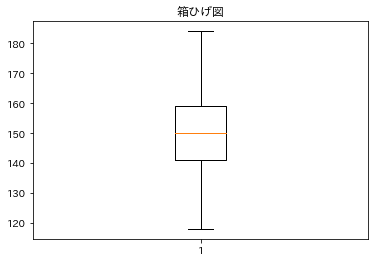

In [379]:
# 3-4

data = pd.read_csv("初歩からの統計-演習/3-4.csv")[["value"]].values.reshape(1, -1)[0]

print(f"範囲 -> {data.max() - data.min()}")

quantiles = np.quantile(data, [0.25, 0.5, 0.75], axis=0, interpolation="higher")
for index, value in enumerate(quantiles):
    print(f"第{index+1}四分位数 -> {value}")

print(f"四分位範囲 -> {quantiles[2] - quantiles[0]}")
print(f"四分位偏差 -> {(quantiles[2] - quantiles[0]) / 2}")

fig, ax = plt.subplots()
ax.boxplot(x=data)
ax.set_title("箱ひげ図")

ave_deviation = calc_deviation(data, data.mean()).mean()
print(f"平均偏差 -> {ave_deviation}")

median_deviation = calc_deviation(data, np.median(data)).mean()
print(f"メディアン偏差 -> {median_deviation}")

print(f"分散 -> {np.var(data, ddof=1)}")

print(f"標準偏差 -> {np.std(data, ddof=1)}")

print(f"変動係数 -> {np.std(data, ddof=1)/data.mean()}")

skew = data.shape[0] / ((data.shape[0] - 1)*(data.shape[0] - 2)) * calc_3pow(data, data.mean()).sum() / math.pow(round(np.std(data)), 3)
print(f"標本歪度 -> {skew}")

mean = data.mean()
s = np.std(data, ddof=1)
count_1 = data[(data >= (mean - s))&(data <= (mean + s))].shape[0]
print(f"68% 乗車率範囲 ->{mean -s} - {mean + s} カウント -> {count_1}")
count_2 = data[(data >= (mean - 2*s))&(data <= (mean + 2*s))].shape[0]
print(f"95% 乗車率範囲 ->{mean -2*s} - {mean +2* s} カウント -> {count_2}")
print(f"少なくとも89% 乗車率範囲 ->{mean -3*s} - {mean +3* s}")

範囲 -> 285
第1四分位数 -> 435
第2四分位数 -> 462
第3四分位数 -> 500
四分位範囲 -> 65
四分位偏差 -> 32.5
平均偏差 -> 53.4
メディアン偏差 -> 53.4
分散 -> 5184.0
標準偏差 -> 72.0
変動係数 -> 0.1565217391304348
標本歪度 -> 0.03932738285288573
68% 乗車率範囲 ->388.0 - 532.0 カウント -> 21
少なくとも75% 乗車率範囲 ->316.0 - 604.0 カウント -> 29


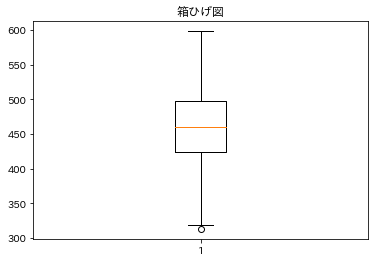

In [403]:
# 3-5

data = pd.read_csv("初歩からの統計-演習/1-1.csv")[["value"]].values.reshape(1, -1)[0]

print(f"範囲 -> {data.max() - data.min()}")

quantiles = np.quantile(data, [0.25, 0.5, 0.75], axis=0, interpolation="higher")
for index, value in enumerate(quantiles):
    print(f"第{index+1}四分位数 -> {value}")

print(f"四分位範囲 -> {quantiles[2] - quantiles[0]}")
print(f"四分位偏差 -> {(quantiles[2] - quantiles[0]) / 2}")

fig, ax = plt.subplots()
ax.boxplot(x=data)
ax.set_title("箱ひげ図")

ave_deviation = calc_deviation(data, data.mean()).mean()
print(f"平均偏差 -> {ave_deviation}")

median_deviation = calc_deviation(data, np.median(data)).mean()
print(f"メディアン偏差 -> {median_deviation}")

print(f"分散 -> {np.var(data, ddof=1)}")

print(f"標準偏差 -> {np.std(data, ddof=1)}")

print(f"変動係数 -> {np.std(data, ddof=1)/data.mean()}")

skew = data.shape[0] / ((data.shape[0] - 1)*(data.shape[0] - 2)) * calc_3pow(data, data.mean()).sum() / math.pow(round(np.std(data, ddof=1)), 3)
print(f"標本歪度 -> {skew}")

mean = data.mean()
s = np.std(data, ddof=1)
count_1 = data[(data >= (mean - s))&(data <= (mean + s))].shape[0]
print(f"68% 乗車率範囲 ->{mean -s} - {mean + s} カウント -> {count_1}")
count_2 = data[(data >= (mean - 2*s))&(data <= (mean + 2*s))].shape[0]
print(f"少なくとも75% 乗車率範囲 ->{mean -2*s} - {mean +2* s} カウント -> {count_2}")

範囲 -> 63
第1四分位数 -> 37.0
第2四分位数 -> 44.5
第3四分位数 -> 58.5
四分位範囲 -> 21.5
四分位偏差 -> 10.75
平均偏差 -> 13.066666666666666
メディアン偏差 -> 12.633333333333333
分散 -> 256.0
標準偏差 -> 16.0
変動係数 -> 0.32653061224489793
標本歪度 -> 0.8340363137419637
68% 乗車率範囲 ->33.0 - 65.0 カウント -> 41


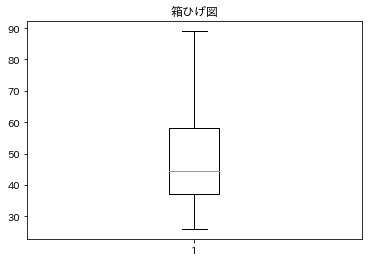

In [411]:
# 3-6

data = pd.read_csv("初歩からの統計-演習/1-2.csv", names=["value", "a", "b", "c", "d", "e", "f"])[["value"]].values.reshape(1, -1)[0]

print(f"範囲 -> {data.max() - data.min()}")

quantiles = np.quantile(data, [0.25, 0.5, 0.75], axis=0, interpolation="midpoint")
for index, value in enumerate(quantiles):
    print(f"第{index+1}四分位数 -> {value}")

print(f"四分位範囲 -> {quantiles[2] - quantiles[0]}")
print(f"四分位偏差 -> {(quantiles[2] - quantiles[0]) / 2}")

fig, ax = plt.subplots()
ax.boxplot(x=data)
ax.set_title("箱ひげ図")

ave_deviation = calc_deviation(data, data.mean()).mean()
print(f"平均偏差 -> {ave_deviation}")

median_deviation = calc_deviation(data, np.median(data)).mean()
print(f"メディアン偏差 -> {median_deviation}")

print(f"分散 -> {np.var(data, ddof=1)}")

print(f"標準偏差 -> {np.std(data, ddof=1)}")

print(f"変動係数 -> {np.std(data, ddof=1)/data.mean()}")

skew = data.shape[0] / ((data.shape[0] - 1)*(data.shape[0] - 2)) * calc_3pow(data, data.mean()).sum() / math.pow(round(np.std(data, ddof=1)), 3)
print(f"標本歪度 -> {skew}")

mean = data.mean()
s = np.std(data, ddof=1)
count_1 = data[(data >= (mean - s))&(data <= (mean + s))].shape[0]
print(f"68% 乗車率範囲 ->{mean -s} - {mean + s} カウント -> {count_1}")

範囲 -> 56
第1四分位数 -> 35.5
第2四分位数 -> 44.0
第3四分位数 -> 52.5
四分位範囲 -> 17.0
四分位偏差 -> 8.5
平均偏差 -> 9.52
メディアン偏差 -> 9.52
分散 -> 144.0
標準偏差 -> 12.0
変動係数 -> 0.2727272727272727
標本歪度 -> -0.0003578872626491674
68% 乗車率範囲 ->32.0 - 56.0 カウント -> 68
95% 乗車率範囲 ->20.0 - 68.0 カウント -> 96
少なくとも89% 乗車率範囲 ->8.0 - 80.0 カウント -> 100


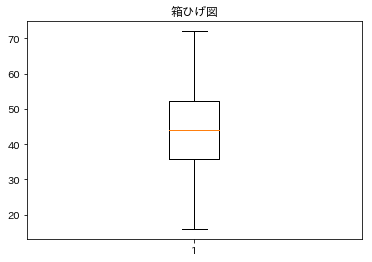

In [436]:
# 3-7

data = pd.read_csv("初歩からの統計-演習/1-3.csv", names=["value"])["value"].astype(int).values

print(f"範囲 -> {data.max() - data.min()}")

quantiles = np.quantile(data, [0.25, 0.5, 0.75], axis=0, interpolation="midpoint")
for index, value in enumerate(quantiles):
    print(f"第{index+1}四分位数 -> {value}")

print(f"四分位範囲 -> {quantiles[2] - quantiles[0]}")
print(f"四分位偏差 -> {(quantiles[2] - quantiles[0]) / 2}")

fig, ax = plt.subplots()
ax.boxplot(x=data)
ax.set_title("箱ひげ図")

ave_deviation = calc_deviation(data, data.mean()).mean()
print(f"平均偏差 -> {ave_deviation}")

median_deviation = calc_deviation(data, np.median(data)).mean()
print(f"メディアン偏差 -> {median_deviation}")

print(f"分散 -> {np.var(data, ddof=1)}")

print(f"標準偏差 -> {np.std(data, ddof=1)}")

print(f"変動係数 -> {np.std(data, ddof=1)/data.mean()}")

skew = data.shape[0] / ((data.shape[0] - 1)*(data.shape[0] - 2)) * calc_3pow(data, data.mean()).sum() / math.pow(np.std(data, ddof=1), 3)
print(f"標本歪度 -> {skew}")

mean = data.mean()
s = np.std(data, ddof=1)
count_1 = data[(data >= (mean - s))&(data <= (mean + s))].shape[0]
print(f"68% 乗車率範囲 ->{mean -s} - {mean + s} カウント -> {count_1}")
count_2 = data[(data >= (mean - 2*s))&(data <= (mean + 2*s))].shape[0]
print(f"95% 乗車率範囲 ->{mean -2*s} - {mean +2* s} カウント -> {count_2}")
count_3 = data[(data >= (mean - 3*s))&(data <= (mean + 3*s))].shape[0]
print(f"少なくとも89% 乗車率範囲 ->{mean -3*s} - {mean +3* s} カウント -> {count_3}")

### 第４章

In [440]:
def comb(x, n):
    return math.factorial(x) / (math.factorial(n) * math.factorial(x-n))

def perm(x, n):
    return math.factorial(x)/math.factorial(x-n)

In [444]:
# 4-1
print(f"[1] -> {perm(3, 2)}")
print(f"[2] -> {perm(4, 3)}")
print(f"[3] -> {perm(5, 2)}")

[1] -> 6.0
[2] -> 24.0
[3] -> 20.0


In [447]:
# 4-2
perm(18, 3)

4896.0

In [460]:
# 4-3

print(f" [1] -> { math.factorial(3)*math.factorial(6) }")

print(f" [2] -> { math.factorial(2)*math.factorial(5)*math.factorial(3) }")
print(f" [3] -> { math.factorial(2)*math.factorial(7)}")
print(f" [4] -> { perm(3, 2)*math.factorial(6)}")
print(f" [5] -> { perm(5, 2)*math.factorial(6)}")
print(f" [6] -> { perm(5, 5) * perm(6,3) }")

 [1] -> 4320
 [2] -> 1440
 [3] -> 10080
 [4] -> 4320.0
 [5] -> 14400.0
 [6] -> 14400.0


In [465]:
# 4-4

print(f"[1] -> {math.factorial(9-1)}")
print(f"[2] -> {math.factorial(6 -1) * math.factorial(4)}")
print(f"[3] -> {math.factorial(4) * math.factorial(5)}")

[1] -> 40320
[2] -> 2880
[3] -> 2880


In [466]:
# 4-5

math.factorial(10-1)/2

181440.0

In [469]:
# 4-6

print(f"[1] -> {math.pow(26, 2)}")

print(f"[2] -> {math.pow(26, 3)}")

print(f"[3] -> {math.pow(26, 4)}")

[1] -> 676.0
[2] -> 17576.0
[3] -> 456976.0


In [470]:
# 4-7

math.pow(2, 9)

512.0

In [471]:
# 4-8

math.factorial(10)/(math.factorial(3) * math.factorial(4) * math.factorial(2))

12600.0

In [480]:
# 4-9

print(f"[1] -> {math.factorial(9) / (math.factorial(4) *(math.factorial(5)))}")

print(f"[2] -> {math.factorial(5)/(math.factorial(3)*math.factorial(2)) * (math.factorial(4)/math.factorial(3))}")

print(f"[2] -> {math.factorial(9) / (math.factorial(4) *(math.factorial(5))) - math.factorial(5) / (math.factorial(3) *(math.factorial(2)))*math.factorial(3)/2}")

[1] -> 126.0
[2] -> 40.0
[2] -> 96.0


In [483]:
# 4-10

print(f"[1] -> {comb(4, 2)}")

print(f"[2] -> {comb(7, 3)}")

[1] -> 6.0
[2] -> 35.0


In [489]:
# 4-11

print(f"[1] -> {comb(17,  5)}")

print(f"[2] -> {comb(10,  3) * comb(7, 2)}")

print(f"[3] -> {comb(10,  2) * comb(7, 3)}")

print(f"[4] -> {comb(17,  5) - comb(7, 5)}")

print(f"[5] -> {comb(17,  5) - comb(10, 5)}")

print(f"[6] -> {comb(17,  5) - comb(10, 5) - comb(7, 5)}")

print(f"[7] -> {comb(15, 3)}")

print(f"[8] -> {comb(17,  5) - comb(15, 5)}")

[1] -> 6188.0
[2] -> 2520.0
[3] -> 1575.0
[4] -> 6167.0
[5] -> 5936.0
[6] -> 5915.0
[7] -> 455.0
[8] -> 3185.0


In [491]:
# 4-12

comb(20+3-1, 20)

231.0

### 第5章

In [506]:
# 5-1

print(f"[1] -> {Fraction(1, round(math.pow(2, 3)))}")

print(f"[2] -> {Fraction(3, round(math.pow(2, 3)))}")

[1] -> 1/8
[2] -> 3/8


In [521]:
# 5-2

print(f"[1] -> {Fraction(1, round(math.pow(6, 3)))}")

print(f"[2] -> {Fraction(1*6, round(math.pow(6, 3)))}")

print(f"[3] -> {Fraction(1*3, round(math.pow(6, 3)))}")

print(f"[4] -> {Fraction(round(perm(6, 3)), round(math.pow(6, 3)))}")

print(f"[5] -> { Fraction(1*3, round(math.pow(6, 3)))}")

print(f"[6] -> { Fraction(1*3 + 1*3, round(math.pow(6, 3)))}")

print(f"[7] -> { Fraction(1 + 1*3 + math.factorial(3) , round(math.pow(6, 3)))}")

print(f"[8] -> { Fraction(math.factorial(3) , round(math.pow(6, 3)))}")

print(f"[9] -> { Fraction(math.factorial(3)*2 , round(math.pow(6, 3)))}")

[1] -> 1/216
[2] -> 1/36
[3] -> 1/72
[4] -> 5/9
[5] -> 1/72
[6] -> 1/36
[7] -> 5/108
[8] -> 1/36
[9] -> 1/18


In [527]:
# 5-3

print(f"[1] -> {Fraction(3, round(math.pow(3, 3)))}")

print(f"[2] -> {Fraction(round(perm(3, 1) * 3), round(math.pow(3, 3)))}")

print(f"[3] -> {Fraction(3 + math.factorial(3), round(math.pow(3, 3)))}")

[1] -> 1/9
[2] -> 1/3
[3] -> 1/3


In [528]:
# 5-4

print(f"ans -> {Fraction(math.factorial(10-1)*2, math.factorial(11-1))}")

ans -> 1/5


In [543]:
# 5-5

print(f"[1] -> {Fraction(round(comb(13, 4)), round(comb(52, 4)))}")

print(f"[2] -> {Fraction(round(comb(13, 4))* 4, round(comb(52, 4)))}")

print(f"[3] -> {Fraction(round(math.pow(13, 4)), round(comb(52, 4)))}")

print(f"[4] -> {Fraction(round(comb(13, 2) *comb(13, 2)), round(comb(52, 4)))}")

print(f"[5] -> {Fraction(round(comb(4, 2) *comb(48, 2)), round(comb(52, 4)))}")

[1] -> 11/4165
[2] -> 44/4165
[3] -> 2197/20825
[4] -> 468/20825
[5] -> 6768/270725
